## 기술통계 > 기초통계량

기술통계는 주로 수치형데이터에서 사용하고, 범주형 데이터는 빈도수만 확인한다. 
이상치(범주+수치) > 극단치(수치)

$ y = ax + b $ 

중심위치 : 중앙값

제3사분위수와 제 1사분위수 사이의 거리를 자료의 퍼진 정도의 측도로 사용할 수 있는데 이 수치를 사분위수 범위(IQR)이라 한다. interquartile range 

# 1. 기술통계
기술통계란 자료를 그래프나 숫자 등으로 요약하는 통계적 행위, 관련 방법을 말한다.
데이터 분석에 앞서 전체적으로 데이터의 특징을 파악하고 데이터를 다양한 각도로 접근한다.
데이터를 요약하고 시각화해서 잘 설명하는 것에 중점을 두며 데이터에 대해서 쉽게 설명하기 위해 시각화를 많이 활용한다.
기술 통계에서 기본적으로 사용하는 시각화 자료들은 박스플롯(상자그림), 도수분포표, 히스토그램 등이 있으며 이를 기반으로 사실을 객관적으로 확인하는 것을 중점으로 한다. 

# 2. 기술통계 절차

### 1. 데이터의 전체 크기와 형태 확인
- 행과 열의 수를 확인한다.
- 빅데이터 전체를 출력하는 것은 부담이 크므로 상위/하위 n건의 일부만 확인한다

### 2. 수치형 데이터
#### 1) 집단의 특성을 드러내는 요약 통계량을 확인한다.
- 평균, 중앙값, 표준편차, 범위(최대값~최소값), 사분위수 등을 확인한다
- 요약통계량을 상자그림으로 시각화하여 확인한다.

#### 2) 전체 데이터의 분포를 확인한다. 
- 구간별 자료의 개수를 나타내는 표(도수분포표)를 산정한다.
- 도수분포표를 그래프로 표현한 히스토그램을 확인한다.

### 3. 범주형 데이터
- 데이터의 빈도수를 확인한다.


## 3. 작업준비

In [2]:
import sys
from matplotlib import pyplot as plt
from pandas import read_excel
import seaborn as sb

In [3]:
df = read_excel("https://data.hossam.kr/D02/ad-sales.xlsx", index_col="월")
df

,광고비(백만원),매출액(억원)
월,,
1월,2,100
2월,142,1690
3월,122,298
4월,130,390
5월,185,590
6월,121,200
7월,101,190
8월,199,460
9월,221,660


### 데이터 전처리

In [4]:
df.rename(columns={'광고비(백만원)':'adv','매출액(억원)':'salse'},inplace=True)
df.index.name = 'month'
df

,adv,salse
month,,
1월,2,100
2월,142,1690
3월,122,298
4월,130,390
5월,185,590
6월,121,200
7월,101,190
8월,199,460
9월,221,660


## 기초통계량

### 1. 데이터의 범위
##### 최대값~최소값의 구간을 의미

In [5]:
max_adv = df['adv'].max()
min_adv = df['adv'].min()
'광고비 구간은 {min}~{max} 백만원'.format(max = max_adv,min = min_adv)


'광고비 구간은 2~237 백만원'

In [6]:
max_salse = df['salse'].max()
min_salse = df['salse'].min()
'매출액 구간은 {min}~{max} 백만원'.format(max = max_salse,min = min_salse)


'매출액 구간은 100~1690 백만원'

## 합계

In [7]:
sum_adv = df['adv'].sum()
sum_salse = df['adv'].sum()
'광고비의 총 합은 %d백만원이고, 매출액의 총 합은 %d억원이다.' % (sum_adv,sum_salse)

'광고비의 총 합은 1768백만원이고, 매출액의 총 합은 1768억원이다.'

## 평균

- 모든 값을 더한 뒤 개수로 나눈 값
- 평균은 특정 값이 다른 값들의 범위와 차이가 큰 경우 신뢰도가 떨어진다
- 1,2,3,100의 평균이 26.5인데, 이는 100이 다른 값들에 비해 극단적으로 높기 때문이며 이러한 값을 극단치라고 한다. 극단치는 이상치에서 수치로 표현할 수 있는 값을 말한다. 

In [8]:
mean_adv = df['adv'].mean()
mean_salse = df['salse'].mean()
'광고비의 평균은 %d백만원이고, 매출액의 평균은 %d억원입니다.' % (mean_adv,mean_salse)

'광고비의 평균은 147백만원이고, 매출액의 평균은 538억원입니다.'

## 중앙값

- 모든 값을 순서대로 정렬한 후 가운데 위치한 값
- 평균의 신뢰도가 현저히 낮을 경우 데이터의 분포를 확인하기 위해 사용한다.

### 데이터의 수가 홀수인 경우
- 모든 값을 순서대로 정렬한 후 가운데 위치한 값
- 1,2,3,4,5의 중앙값은 3

$m_e = x{(\frac{n+1}2)}$

### 데이터의 수가 짝수인 경우
- 모든 값을 순서대로 정렬한 후 가운데 두 값의 평균값
- 1,2,3,4,5,6의 중앙값은 (3+4)/2이므로 3.5이다.


$m_e = \frac{1}{2}{({x_{\frac{n}{2}} + {x_{\frac{n}{2}+1}}})}$


In [9]:
median_adv = df['adv'].median()
median_salse = df['adv'].median()
'광고비의 중앙값은 %d백만원이고 매출액의 중앙값은 %d억원입니다.' %(median_adv,median_salse)


'광고비의 중앙값은 140백만원이고 매출액의 중앙값은 140억원입니다.'

## 사분위수 

- 데이터 표본을 4개의 동일한 부분으로 나눈 값
- 사분위수를 사용하여 데이터 집합의 범위와 중심 위치를 신속하게 평가할 수 있다. 
- 이는 데이터를 이해하는데 중요한 1단계다.

### 사분위 수의 종류
| 용어               | 설명                                                   |
| ------------------ | ------------------------------------------------------ |
| 1사분위 수(Q1)     | 데이터의 하위 25%가 이 값보다 작거나 같음.             |
| 2사분위 수(Q2)     | 중위수 데이터의 50%가 이 값보다 작거나 같음. (=중앙값) |
| 3사분위 수(Q3)     | 데이터의 하위 75%가 이 값보다 작거나 같음.(=상위 25%)  |
| 사분위간 범위(IQR) | 3사분위 수부터 1사분위 수 구간                         |

- 사분위수는 데이터의 관측이 아닌 계산된 값이다.
- 실존하지 않는 값이기 때문에 사분위수를 정확하게 계산하려면 종종 두 관측치 사이를 보강해야 한다.
- 중위수와 사분위간의 범위는 극단치의 영향을 받지 않기 때문에 평균 및 표준 편차보다 치우침이 많은 데이터의 중심 위치와 범위의 더 나은 측도가 될 수 있다. 

IQR이란 ㅇ사본위의 정상 범위인 Q1과 Q3 사이를 의미하며 사분범위라고 한다. 

### 1사분위 수 
$ Q1 = ((총도수 + 1)*0.25)+1 $


In [10]:
# 사분위수의 위치
adv = list(df['adv'])
총도수 = len(adv)
Q1 = ((총도수 + 1) * 0.25) +1
print('사분위수의 위치', Q1)

# 사분위수의 실제 값
df['adv'].quantile(q=0.25)


사분위수의 위치 4.25


121.75

### 2사분위 수 
중앙값과 동일

In [11]:
df['adv'].quantile(q=0.5)

140.5

### 3사분위 수 
$ Q3 = ((총도수 + 1)*0.75)+1 $

In [12]:
# 사분위수의 위치
adv = list(df['adv'])
총도수 = len(adv)
Q1 = ((총도수 + 1) * 0.75) +1
print('사분위수의 위치', Q1)

# 사분위수의 실제 값
df['adv'].quantile(q=0.75)


사분위수의 위치 10.75


188.5

## 사분위간 범위 
$ Q3 - Q1 $

In [13]:
df['adv'].quantile(q=0.75) - df['adv'].quantile(q=0.25)

66.75

## 분산, 표준편차

In [14]:
print("광고비의 분산은 %f" % df['adv'].var())
print("광고비의 표준편차는 %f" % df['adv'].std())

광고비의 분산은 3911.515152
광고비의 표준편차는 62.542107


## 기초통계량 일괄 산출

### 기초통계량 데이터 프레임 생성

In [15]:
desc = df.describe()
desc

,adv,salse
count,12.000000,12.000000
mean,147.333333,538.166667
std,62.542107,428.774540
min,2.000000,100.000000
25%,121.750000,273.500000
50%,140.500000,425.000000
75%,188.500000,652.500000
max,237.000000,1690.000000


In [16]:
desc.dtypes

adv      float64
salse    float64
dtype: object

In [17]:
# 데이터프레임의 전치(행열 전환)
desc.T

,count,mean,std,min,25%,50%,75%,max
adv,12.0,147.333333,62.542107,2.0,121.75,140.5,188.5,237.0
salse,12.0,538.166667,428.774540,100.0,273.50,425.0,652.5,1690.0


## 기초통계량 시각화

상자그림(boxplot)은 데이터의 범위 및 분포, 사분위 수, 이상치 등을 시각화 한 그래프

In [18]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (7, 4)
plt.rcParams["axes.unicode_minus"] = False

### 모든 컬럼에 대한 일괄 생성

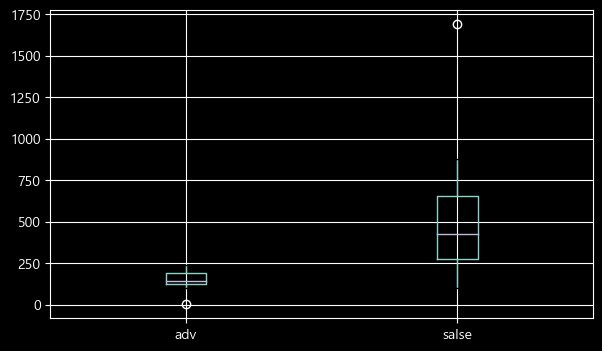

In [19]:
plt.figure()
plt.grid() # 격자는 항상 박스플롯 위에
df.boxplot()
plt.show()
plt.close()

### 특정 컬럼만 시각화

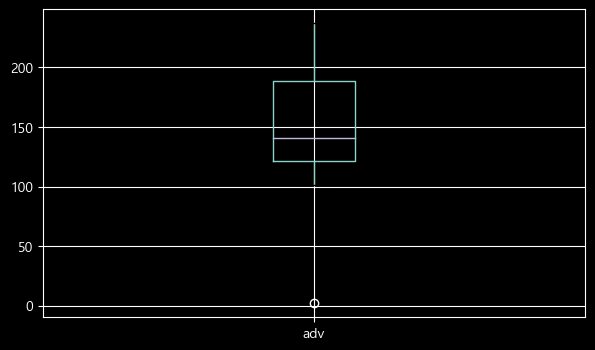

In [20]:
plt.figure()
plt.grid() # 격자는 항상 박스플롯 위에
df.boxplot(['adv'])
plt.show()
plt.close()

### 서브플롯을 활용한 상자그림

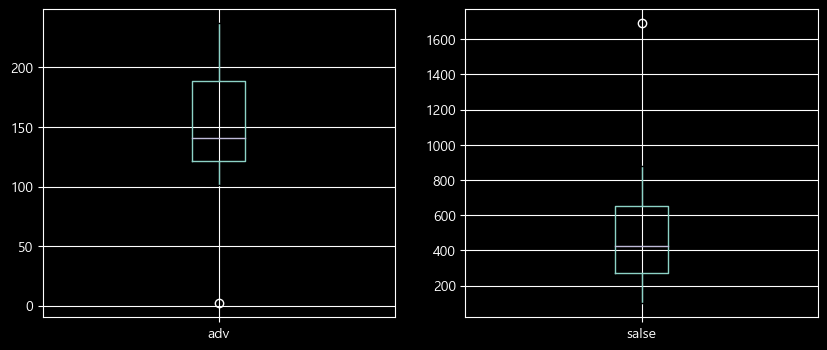

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
df.boxplot(['adv'],ax=ax1)
df.boxplot(['salse'],ax=ax2)
plt.show()
plt.close()

### seaborn을 사용한 상자그림

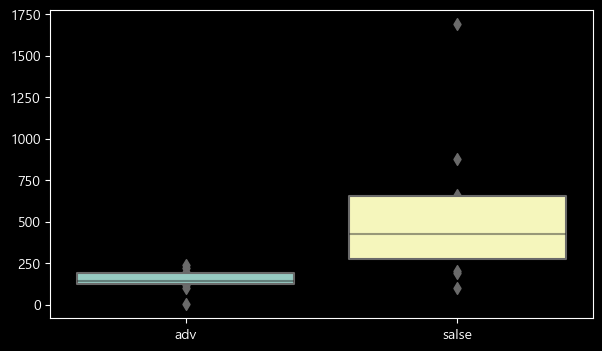

In [22]:
plt.rcParams['figure.figsize'] = (7,4)
plt.figure()
sb.boxenplot(data=df)
plt.show()
plt.close()

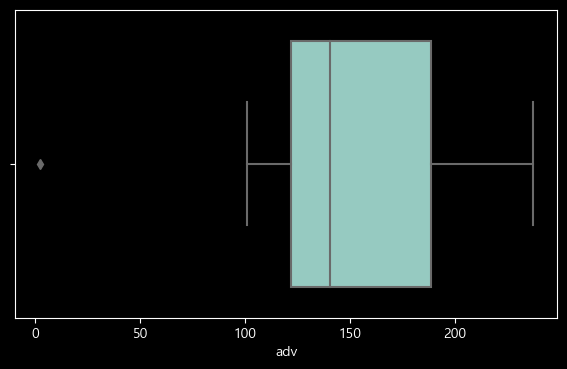

In [23]:
# 가로로 눕히기
plt.figure()
sb.boxplot(data=df,x='adv')
plt.show()
plt.close()

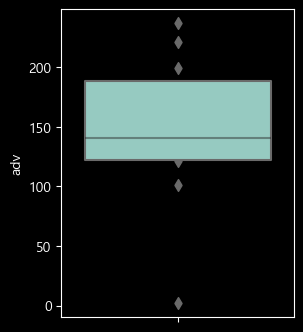

In [24]:
plt.rcParams['figure.figsize'] = (3,4)
plt.figure()
sb.boxenplot(data=df,y='adv')
plt.show()
plt.close()

## 극단치 경계
- 데이터가 극단적으로 크거나 작은 값을 극단치(이상치)라고 한다. 그 값을 결정하는 기준이 되는 값을 극단치 경계라고 한다.

### IQR

##### 1사분위수와 3사분위수의 거리
$ IQR = Q3 - Q1 $
##### 상한 극단치 경계
$상한 = Q3 + IQR * 1.5 $
##### 하한 극단치 경계
$하한 = Q1 - IQR * 1.5 $


In [25]:
# 광고비에 대한 이상치 구하기
q1 = df['adv'].quantile(q=0.25)
q3 = df['adv'].quantile(q=0.75)
iqr = q3-q1 
하한 = q1 - iqr *1.5
하한 #광고비에 대한 하한 극단치 경계값


21.625

In [26]:
df1 = df.query('adv <@하한')
df1['adv']

month
1월    2
Name: adv, dtype: int64

In [27]:
# 매출에 대한 이상치 구하기
q1 = df['salse'].quantile(q=0.25)
q3 = df['salse'].quantile(q=0.75)
iqr = q3-q1 
상한 = q3 + iqr *1.5
상한 #매출액에 대한 상한 극단치 경계값

1221.0

In [28]:
df1 = df.query('salse > @상한')
df1['salse']

month
2월    1690
Name: salse, dtype: int64